<a href="https://colab.research.google.com/github/oilportrait/test_colab/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 군집화를 한다.

In [48]:
import pandas as pd
targetUrl = "https://raw.githubusercontent.com/oilportrait/test_colab/main/insurance.csv"
df = pd.read_csv(targetUrl, sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
import numpy as np
selected_features = ['age', 'charges']
selected_df = df[selected_features]
selected_df.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


AIC와 BIC를 계산한다

In [50]:
from sklearn.mixture import GaussianMixture
import numpy as np

min_components = 1
max_components = 10
best_aic = np.inf
best_bic = np.inf
best_model_aic = None
best_model_bic = None

for n_components in range(min_components, max_components+1):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(selected_df)
    aic = gmm.aic(selected_df)
    bic = gmm.bic(selected_df)

    if aic < best_aic:
        best_aic = aic
        best_model_aic = gmm

    if bic < best_bic:
        best_bic = bic
        best_model_bic = gmm

print("Best number of clusters based on AIC:", best_model_aic.n_components)
print("Best number of clusters based on BIC:", best_model_bic.n_components)

Best number of clusters based on AIC: 10
Best number of clusters based on BIC: 8


overfitting을 방지하기에는 BIC가 적합하다고 알고 있어서 BIC를 채택하였다.

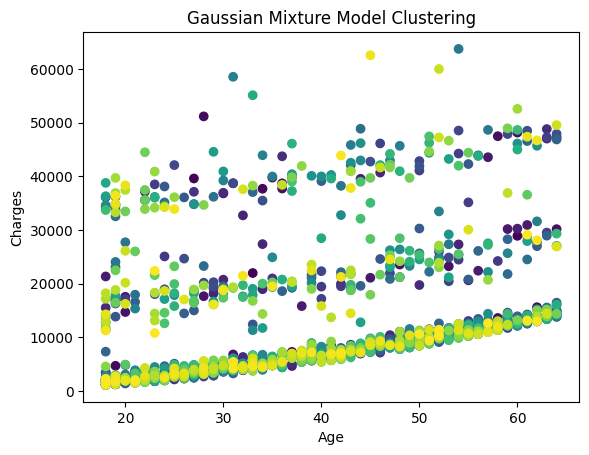

In [51]:
import matplotlib.pyplot as plt
n_clusters = 8
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
gmm.fit(selected_df)

cluster_labels = gmm.predict(selected_df)

plt.scatter(selected_df['age'], selected_df['charges'], c=range(len(cluster_labels)), cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

2. 샘플을 5개 추출한다.

In [52]:
new_samples = gmm.sample(n_samples=5)

# The generated samples are stored in `new_samples` variable as a tuple of (samples, labels)
generated_data = new_samples[0]

# Print the generated samples
print("Generated samples:")
print(generated_data)

Generated samples:
[[3.30803780e+01 3.65658834e+04]
 [6.13073692e+01 1.28947580e+04]
 [5.15858136e+01 1.08288617e+04]
 [5.04106740e+01 9.78295646e+03]
 [3.69877370e+01 5.17681745e+03]]


2퍼센트의 기준을 가지고 이상치를 출력한다.

In [55]:

log_probs = gmm.score_samples(selected_df)

threshold = np.percentile(log_probs, 2)

outliers = selected_df[log_probs < threshold]

print("Outlier data points:")
print(outliers)

Outlier data points:
      age       charges
34     28  51194.559140
242    55  35160.134570
292    25  42112.235600
427    18   7323.734819
516    20  27724.288750
526    19  24059.680190
543    54  63770.428010
577    31  58571.074480
599    52  33471.971890
627    33  11326.714870
739    29  44585.455870
746    34  11737.848840
772    44  12797.209620
803    18  38792.685600
819    33  55135.402090
1012   61  36580.282160
1019   21  26018.950520
1047   22  44501.398200
1095   18   4561.188500
1124   23  40904.199500
1146   60  52590.829390
1156   19  39722.746200
1191   41  13725.471840
1206   59  36910.608030
1223   20  26125.674770
1230   52  60021.398970
1300   45  62592.873090
